<a href="https://colab.research.google.com/github/jiruneko/R-P-S/blob/main/R_P_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=0a94536398172cfdfbbc90faba19be6c24ecf2837cb184dc5d7fadc5b414df0a
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

In [ ]:
hand_name = ["グー", "チョキ", "パー"]
judge_name = ["あいこ", "勝ち", "負け"]

hand_data = [[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]]
judge_data = [0, 1, 2, 2, 0, 1, 1, 2, 0]

x_train = x_test = np.array(hand_data)
y_train = y_test = np.array(judge_data)

print("学習データ（問題）:")
print(x_train)
print(f"学習データ（答え）: {y_train}")

学習データ（問題）:
[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]
 [2 0]
 [2 1]
 [2 2]]
学習データ（答え）: [0 1 2 2 0 1 1 2 0]


In [ ]:
model = keras.models.Sequential()
model.add(layers.Dense(8, activation="relu", input_dim=2))
model.add(layers.Dense(8, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123 (492.00 B)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.2182 - val_accuracy: 1.0000 - val_loss: 0.2193
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 1.0000 - loss: 0.2193 - val_accuracy: 1.0000 - val_loss: 0.2177
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 1.0000 - loss: 0.2177 - val_accuracy: 1.0000 - val_loss: 0.2172
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 1.0000 - loss: 0.2172 - val_accuracy: 1.0000 - val_loss: 0.2169
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 1.0000 - loss: 0.2169 - val_accuracy: 1.0000 - val_loss: 0.2166
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 1.0000 - loss: 0.2166 - val_accuracy: 1.0000 - val_loss: 0.2161
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 1.0000 - loss: 0.2161 - val_accuracy: 1.0000 - val_loss: 0.2156
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 1.0000 - loss: 0.2156 - val_accuracy: 1.000

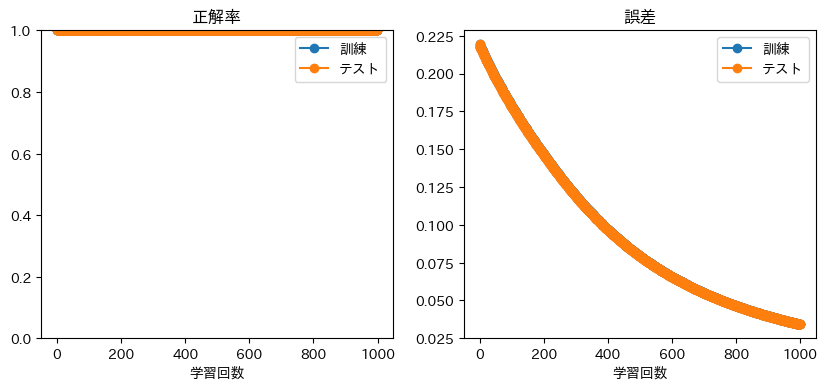

In [ ]:
param = [["正解率", "accuracy","val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.title(param[i][0])
  plt.plot(history.history[param[i][1]], "o-")
  plt.plot(history.history[param[i][2]], "o-")
  plt.xlabel("学習回数")
  plt.legend(["訓練","テスト"], loc="best")
  if i==0:
    plt.ylim([0,1])

In [ ]:
pre = model.predict(x_test)
for i in range(3):
  print(f"{pre[i][0]:.0%} {pre[i][1]:.0%} {pre[i][2]:.0%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
100% 0% 0%
0% 98% 2%
0% 4% 96%


In [ ]:
for i in range(len(x_test)):
  hand1 = hand_name[x_test[i][0]]
  hand2 = hand_name[x_test[i][1]]
  index = np.argmax(pre[i])
  judge = judge_name[index]
  print(f"私は「{hand1}」、相手は「{hand2}」なので、{judge}")

私は「グー」、相手は「グー」なので、あいこ
私は「グー」、相手は「チョキ」なので、勝ち
私は「グー」、相手は「パー」なので、負け
私は「チョキ」、相手は「グー」なので、負け
私は「チョキ」、相手は「チョキ」なので、あいこ
私は「チョキ」、相手は「パー」なので、勝ち
私は「パー」、相手は「グー」なので、勝ち
私は「パー」、相手は「チョキ」なので、負け
私は「パー」、相手は「パー」なので、あいこ
